# Setup

## Colab

In [4]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [5]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertPos

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertPos)

# Import the model and funcs required from utils
from classes.models.BertPos import BertPos
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

In [6]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertPos",
    "model_base": "bert-base-cased",
    # System Configuration
    "device": "cuda:0",
    "threads": 10,
    "seed": 0,
    # Data Configuration
    "data_dir": "../data",
    "data_ds": "manual",
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 40,
    "lr": 1e-2,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 10,
    "save_dir": "../models/",
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Processing files: 100%|██████████| 40/40 [00:13<00:00,  2.95it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 2899.02it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 4057.17it/s]



5(P) = 5(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertPos",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "manual",
  "data_dir": "../data",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 40,
  "lr": 0.01,
  "mu": 0.25,
  "epochs": 20,
  "patience":

# Model Training

In [7]:
# Create and observe the model
untrained_model = BertPos(config).to(DEVICE)
print(untrained_model)

BertPos(
  (bertModel_cell): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
    

## Training Metrics

1. GPU Model: 521 mb
2. GPU Training: 33.6 gb

3. Per Epoch Train Time: 38s
4. Per Epoch Val Time: 15s
5. Last Epoch: 16


In [8]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:14<00:00, 14.65s/it]


Train Loss: 1.5001763105392456, Perplexity: 1.0000037504478092
Val Loss: 1.1921906471252441, Perplexity: 1.0000029804810595


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:14<00:00, 14.79s/it]


Train Loss: 1.2125389575958252, Perplexity: 1.0000030313519885
Val Loss: 1.2104672193527222, Perplexity: 1.0000030261726272


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.01s/it]


Train Loss: 1.249038577079773, Perplexity: 1.000003122601318
Val Loss: 1.0274865627288818, Perplexity: 1.000002568719706


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:14<00:00, 14.94s/it]


Train Loss: 1.0533912181854248, Perplexity: 1.000002633481513
Val Loss: 0.8800616264343262, Perplexity: 1.0000022001564863


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.21s/it]


Train Loss: 0.9258982539176941, Perplexity: 1.000002314748314
Val Loss: 0.7892019152641296, Perplexity: 1.0000019730067344


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.22s/it]


Train Loss: 0.820340633392334, Perplexity: 1.0000020508536864
Val Loss: 0.5747075080871582, Perplexity: 1.0000014367698025


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.12s/it]


Train Loss: 0.6321220993995667, Perplexity: 1.0000015803064972
Val Loss: 0.45656272768974304, Perplexity: 1.0000011414074705


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.10s/it]


Train Loss: 0.501716136932373, Perplexity: 1.000001254291129
Val Loss: 0.31587234139442444, Perplexity: 1.0000007896811653


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.05s/it]


Train Loss: 0.36777937412261963, Perplexity: 1.000000919448858
Val Loss: 0.2601486146450043, Perplexity: 1.000000650371748


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.26s/it]


Train Loss: 0.3012649416923523, Perplexity: 1.0000007531626378
Val Loss: 0.2060873806476593, Perplexity: 1.0000005152185842

Model Saved

Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.07s/it]


Train Loss: 0.2506842017173767, Perplexity: 1.0000006267107007
Val Loss: 0.18331852555274963, Perplexity: 1.0000004582964188


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.27s/it]


Train Loss: 0.22020746767520905, Perplexity: 1.0000005505188208
Val Loss: 0.15869221091270447, Perplexity: 1.000000396730606


Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.26s/it]


Train Loss: 0.1970372349023819, Perplexity: 1.0000004925932087
Val Loss: 0.14527948200702667, Perplexity: 1.000000363198771


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.09s/it]


Train Loss: 0.1795661300420761, Perplexity: 1.000000448915426
Val Loss: 0.1739361733198166, Perplexity: 1.0000004348405278


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.16s/it]


Train Loss: 0.16059474647045135, Perplexity: 1.0000004014869468
Val Loss: 0.12462285161018372, Perplexity: 1.0000003115571776


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.27s/it]


Train Loss: 0.14448846876621246, Perplexity: 1.0000003612212371
Val Loss: 0.13444651663303375, Perplexity: 1.000000336116348


Epoch 16


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.02s/it]


Train Loss: 0.13296684622764587, Perplexity: 1.000000332417171
Val Loss: 0.1390783041715622, Perplexity: 1.0000003476958208


EARLY STOPPING at epoch 16, best epoch 14
Train Loss = 0.16059474647045135, Perplexity = 1.0000004014869468
Val Loss = 0.12462285161018372, Perplexity = 1.0000003115571776


TRAINING DONE at epoch 16, best epoch 14
Train Loss = 0.16059474647045135, Perplexity = 1.0000004014869468
Val Loss = 0.12462285161018372, Perplexity = 1.0000003115571776


# Evaluation

In [9]:
# Params
loc = 0
thresh = 0.5
infer_batch_size = 40

## Single Example


Filename: ../data/manual_train/dlportfoliobydelinquencystatus.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(39,13): 0.92786902189254760742
(39,12): 0.93375414609909057617
(37,0): 0.93479257822036743164
(39,9): 0.93481945991516113281
(39,8): 0.93489873409271240234
(37,1): 0.93536680936813354492
(39,0): 0.93545651435852050781
(39,7): 0.93546432256698608398
(39,1): 0.93556469678878784180
(39,2): 0.93585747480392456055
(39,6): 0.93607312440872192383
(39,10): 0.93619680404663085938
(39,3): 0.93648076057434082031
(39,11): 0.93667608499526977539
(36,0): 0.93667989969253540039
(39,5): 0.93690353631973266602
(39,4): 0.93710273504257202148
(36,1): 0.93711841106414794922
(32,0): 0.93791830539703369141
(35,0): 0.93813478946685791016
(35,1): 0.93822878599166870117
(33,0): 0.93825042247772216797
(34,1): 0.93848103284835815430
(34,0): 0.93848872184753417969
(31,0): 0.93855345249176025391
(33,1): 0.93871438503265380859
(32,1): 0.93923306465148925781
(25,1): 0.93990993499755859375
(26,1): 

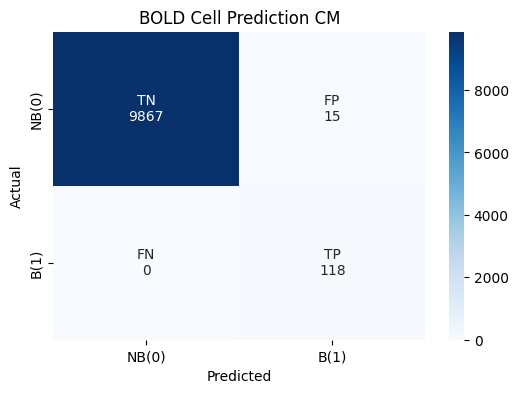


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)


Filename: ../data/manual_val/ffelbydefermenttype.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,15): 0.09228199720382690430
(0,16): 0.09259686619043350220
(0,17): 0.10166286677122116089
(0,14): 0.11735651642084121704
(0,13): 0.19619615375995635986
(0,12): 0.31261932849884033203
(0,10): 0.32238316535949707031
(0,11): 0.34600305557250976562
(0,9): 0.35637044906616210938
(0,8): 0.52659529447555541992
(0,7): 0.74327319860458374023
(0,0): 0.82145643234252929688
(0,2): 0.82817125320434570312
(0,3): 0.83049011230468750000
(0,1): 0.83618050813674926758
(0,6): 0.83797574043273925781
(0,4): 0.85017597675323486328
(0,5): 0.85931479930877685547
(32,0): 0.93801486492156982422
(31,0): 0.93870544433593750000
(32,1): 0.93931460380554199219
(25,1): 0.94022428989410400391
(26,1): 0.94033896923065185547
(30,0): 0.94034868478775024414
(20,0): 0.94040256738662719727
(31,1): 0.94044411182403564453
(25,0): 0.94049483537673950195
(19,0): 0.94053381681442260742
(21,0): 0.94094145298004150391
(20,

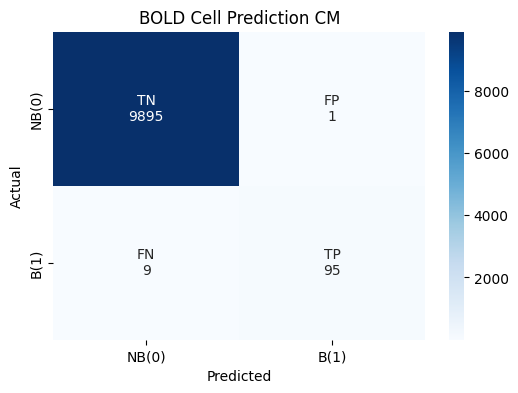


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)


Filename: ../data/manual_test/dlportfoliobyrepaymentplan.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,19): 0.04497866705060005188
(5,18): 0.04783393815159797668
(5,15): 0.04919987171888351440
(5,14): 0.04967035353183746338
(5,16): 0.07132287323474884033
(5,17): 0.07609485834836959839
(5,4): 0.17718510329723358154
(5,5): 0.18752911686897277832
(5,2): 0.19314080476760864258
(5,3): 0.21413528919219970703
(5,9): 0.93275582790374755859
(5,8): 0.93493092060089111328
(38,0): 0.93493813276290893555
(38,1): 0.93524760007858276367
(37,0): 0.93530100584030151367
(37,1): 0.93588459491729736328
(5,7): 0.93624109029769897461
(5,6): 0.93649446964263916016
(36,0): 0.93707454204559326172
(36,1): 0.93753767013549804688
(32,0): 0.93818795680999755859
(35,0): 0.93846446275711059570
(33,0): 0.93849921226501464844
(35,1): 0.93854999542236328125
(34,1): 0.93874293565750122070
(34,0): 0.93874996900558471680
(31,0): 0.93883466720581054688
(33,1): 0.93899780511856079102
(32,1): 0.939478993415832

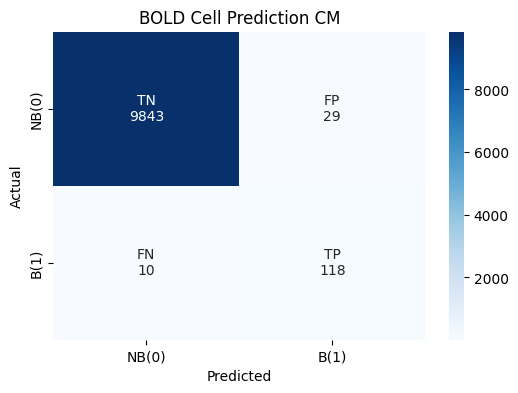


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

## All Examples

Batch Inference: 100%|██████████| 1/1 [00:15<00:00, 15.17s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 396652:3348 | Actual = 396714:3286
Accuracy: 99.98% | Precision: 98.15% | Recall: 100.00% | F1-Score: 0.99



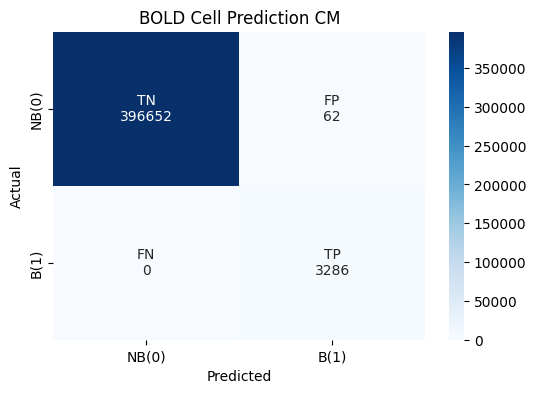

In [13]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:14<00:00, 14.61s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49617:383 | Actual = 49602:398
Accuracy: 99.96% | Precision: 99.22% | Recall: 95.48% | F1-Score: 0.97



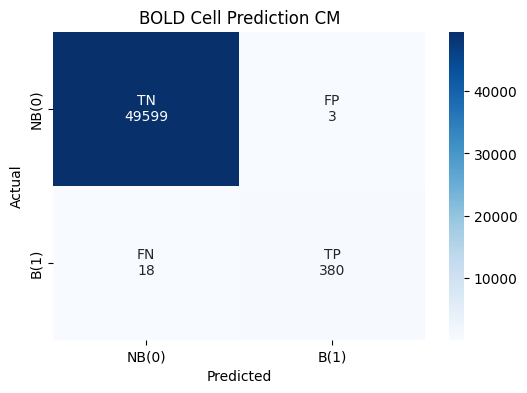

In [14]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=0.9331,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:14<00:00, 14.84s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49585:415 | Actual = 49606:394
Accuracy: 99.92% | Precision: 92.53% | Recall: 97.46% | F1-Score: 0.95



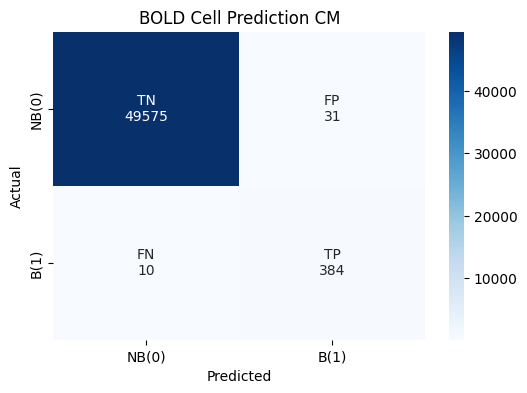

In [15]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)